In [72]:
### loading packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import datetime

In [36]:
df = pd.read_csv('pub rank - final order.csv')

In [37]:
df.head()

,Rank,publisher_id,Publisher_name,num_skus,num_products,num_retailers,total_points,points_mean,importance_mode,remaining_lifecycle_months_mean,num_geographies,num_listings,weighted_score
0,1,3,Electronic Arts,1764,110,983,401275,14.062062,1,7.693405,79,28536,1.084979e+06
1,2,19,Ubisoft,2426,87,885,377481,13.111532,2,14.200313,78,28790,1.039824e+06
2,3,2,Sony,1620,60,1014,299713,12.419733,1,20.702511,79,24132,8.378843e+05
3,4,20,THQ Nordic,896,111,742,287740,15.811628,2,20.669964,74,18198,7.554566e+05
4,5,4,2K Games,1542,69,913,327091,14.462814,1,4.615715,78,327091,8.777012e+05


In [38]:
# specify the order of the categories for column 'B'
categories = [1, 2, 3, 4, 5]

df['importance_mode'] = pd.Categorical(df['importance_mode'], categories=categories)


In [39]:
df = pd.get_dummies(df, columns=['importance_mode'], drop_first =True)

In [40]:
df.head()

,Rank,publisher_id,Publisher_name,num_skus,num_products,num_retailers,total_points,points_mean,remaining_lifecycle_months_mean,num_geographies,num_listings,weighted_score,importance_mode_2,importance_mode_3,importance_mode_4,importance_mode_5
0,1,3,Electronic Arts,1764,110,983,401275,14.062062,7.693405,79,28536,1.084979e+06,0,0,0,0
1,2,19,Ubisoft,2426,87,885,377481,13.111532,14.200313,78,28790,1.039824e+06,1,0,0,0
2,3,2,Sony,1620,60,1014,299713,12.419733,20.702511,79,24132,8.378843e+05,0,0,0,0
3,4,20,THQ Nordic,896,111,742,287740,15.811628,20.669964,74,18198,7.554566e+05,1,0,0,0
4,5,4,2K Games,1542,69,913,327091,14.462814,4.615715,78,327091,8.777012e+05,0,0,0,0


In [41]:
X = df.drop(columns = ['publisher_id','Publisher_name','weighted_score','Rank'])
y = df['Rank']



In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=456)

In [43]:
# Checking input sample size are correct
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (47, 12)
y_train shape: (47,)
X_test shape: (12, 12)
y_test shape: (12,)


In [44]:
def train_and_test(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse_int = mean_squared_error(y_test, y_pred)
    mse = round(mse_int, 3)
    rmse = round((mse_int)**0.5, 3)
    mae = round(mean_absolute_error(y_test, y_pred), 3)
    r2 = round(r2_score(y_test, y_pred)
    print(f'MAE = {mae}')
    print(f'RMSE = {rmse}')

In [45]:
models = [Lasso(),Ridge(),ElasticNet()]

for model in models:
    train_and_test(model)

MAE = 6.659
RMSE = 7.515
MAE = 6.978
RMSE = 7.457
MAE = 6.62
RMSE = 7.414


In [46]:
# First let's have a function that allows you to print the performance metric

def get_reg_results(truth, prediction, df, idx):
    '''
    This function generates a results dataframe given your y_test and predictions. 
    It allows you to take the output of this function and put it into the next time you call the function
    Filling out the entirity of the dataframe one function call (and row) at a time
    Inputs:
    - truth = y_test, the actual values
    - prediction = your predictions
    - df = a dataframe that is already set up to hold our data. 
    - idx = the method that you are using (which corresponds to a row index)
    Output:
    - the input df, but with another row filled out
    '''
    
    mse_int = mean_squared_error(y_test, y_pred)
    mse = round(mse_int, 3)
    rmse = round((mse_int)**0.5, 3)
    mae = round(mean_absolute_error(y_test, y_pred), 3)
    
    SS_Residual = sum((truth-prediction)**2)       
    SS_Total = sum((truth-np.mean(truth))**2)     
    r_squared = 1 - (float(SS_Residual))/SS_Total
    
    r2 = round(r_squared, 3)
    
    df.loc[idx, :] = [rmse, mae, r2]
    
    return df

In [47]:
# LASSO 
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import Lasso

# Create a Ridge regression object
lasso = Lasso()  # You can adjust the value of the regularization parameter 'alpha'

# Train the Ridge regression model
lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = lasso.predict(X_test)

# Evaluate the model using mean squared error
#mae = mean_absolute_error(y_test, y_pred)
#print("Mean Absolute Error:", mae)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("Root Mean Squared Error:", rmse)

In [48]:
## Instead of printing individual performance metric - Setting up a results dataframe first and then add the LASSO results in
results = pd.DataFrame(index = ['Lasso', 'Ridge','ElasticNet'], columns = ['RMSE', 'MAE', 'R2'])

results = get_reg_results(y_test, y_pred, results, 'Lasso')


results

,RMSE,MAE,R2
Lasso,7.515,6.659,0.864
Ridge,NaN,NaN,NaN
ElasticNet,NaN,NaN,NaN


In [49]:
# Ridge 
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import Ridge

# Create a Ridge regression object
Ridge = Ridge()  # You can adjust the value of the regularization parameter 'alpha'

# Train the Ridge regression model
Ridge.fit(X_train, y_train)

# Predict on the test set
y_pred = Ridge.predict(X_test)

# Evaluate the model using mean squared error
#mae = mean_absolute_error(y_test, y_pred)
#print("Mean Absolute Error:", mae)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("Root Mean Squared Error:", rmse)

In [50]:
## Instead of printing individual performance metric - Setting up a results dataframe first and then add the LASSO results in
results = pd.DataFrame(index = ['Lasso', 'Ridge','ElasticNet'], columns = ['RMSE', 'MAE', 'R2'])

results = get_reg_results(y_test, y_pred, results, 'Ridge')


results

,RMSE,MAE,R2
Lasso,NaN,NaN,NaN
Ridge,7.457,6.978,0.867
ElasticNet,NaN,NaN,NaN


In [51]:
# ElasticNet 
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import ElasticNet

# Create a Ridge regression object
ElasticNet = ElasticNet()  # You can adjust the value of the regularization parameter 'alpha'

# Train the Ridge regression model
ElasticNet.fit(X_train, y_train)

# Predict on the test set
y_pred = ElasticNet.predict(X_test)

# Evaluate the model using mean squared error
#mae = mean_absolute_error(y_test, y_pred)
#print("Mean Absolute Error:", mae)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("Root Mean Squared Error:", rmse)

In [54]:
## Instead of printing individual performance metric - Setting up a results dataframe first and then add the LASSO results in
results = pd.DataFrame(index = ['Lasso', 'Ridge','ElasticNet'], columns = ['RMSE', 'MAE', 'R2'])

results = get_reg_results(y_test, y_pred, results, 'ElasticNet')


results

,RMSE,MAE,R2
Lasso,NaN,NaN,NaN
Ridge,NaN,NaN,NaN
ElasticNet,7.414,6.62,0.868


In [53]:
lasso_df = pd.DataFrame({'variable': list(X_train.columns), 'estimate': lasso.coef_})
lasso_df = lasso_df.sort_values('estimate')
lasso_df

,variable,estimate
4,points_mean,-1.071034
5,remaining_lifecycle_months_mean,-0.400212
1,num_products,-0.149630
2,num_retailers,-0.049523
3,total_points,-0.000041
7,num_listings,-0.000003
6,num_geographies,0.000000
8,importance_mode_2,0.000000
9,importance_mode_3,-0.000000
10,importance_mode_4,0.000000


In [56]:
from sklearn.preprocessing import StandardScaler


In [59]:
X = df.drop(columns = ['publisher_id','Publisher_name','weighted_score','Rank'])
y = df['Rank']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=456)

In [68]:
# Here we will scale the features using StandardScaler 
X = StandardScaler().fit_transform(X)

# You can also try MinMaxScaler
#num_df = MinMaxScaler().fit_transform(num_df)

In [69]:
print(X)

[[ 2.56051193e+00  2.05772475e+00  1.87709709e+00  3.14500327e+00
  -5.90180939e-01 -9.53856103e-01  1.22234386e+00  4.13464662e-01
  -8.28078671e-01 -6.62589156e-01 -1.31306433e-01 -2.69679945e-01]
 [ 3.85319563e+00  1.39398990e+00  1.45008464e+00  2.90639211e+00
  -8.84008784e-01 -2.57326764e-02  1.08523685e+00  4.19501889e-01
   1.20761473e+00 -6.62589156e-01 -1.31306433e-01 -2.69679945e-01]
 [ 2.27932393e+00  6.14822915e-01  2.01217245e+00  2.12651851e+00
  -1.09785755e+00  9.01719045e-01  1.22234386e+00  3.08787698e-01
  -8.28078671e-01 -6.62589156e-01 -1.31306433e-01 -2.69679945e-01]
 [ 8.65573172e-01  2.08658278e+00  8.26995050e-01  2.00645079e+00
  -4.93552747e-02  8.97076584e-01  5.36808805e-01  1.67744758e-01
   1.20761473e+00 -6.62589156e-01 -1.31306433e-01 -2.69679945e-01]
 [ 2.12701377e+00  8.74545245e-01  1.57208820e+00  2.40107076e+00
  -4.66300506e-01 -1.39284749e+00  1.08523685e+00  7.50970240e+00
  -8.28078671e-01 -6.62589156e-01 -1.31306433e-01 -2.69679945e-01]
 [ 1.

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=456)
# Checking input sample size are correct
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (47, 12)
y_train shape: (47,)
X_test shape: (12, 12)
y_test shape: (12,)


In [73]:
models = [Lasso(),Ridge(),ElasticNet()]

for model in models:
    train_and_test(model)

MAE = 7.533
RMSE = 8.781
MAE = 6.62
RMSE = 7.405
MAE = 8.736
RMSE = 10.446


In [100]:
# ElasticNet 
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import ElasticNet

# Create a Ridge regression object
ElasticNet = ElasticNet()  # You can adjust the value of the regularization parameter 'alpha'

# Train the Ridge regression model
ElasticNet.fit(X_train, y_train)

# Predict on the test set
y_pred = ElasticNet.predict(X_test)

# Evaluate the model using mean squared error
#mae = mean_absolute_error(y_test, y_pred)
#print("Mean Absolute Error:", mae)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("Root Mean Squared Error:", rmse)

In [101]:
## Instead of printing individual performance metric - Setting up a results dataframe first and then add the LASSO results in
results = pd.DataFrame(index = ['Lasso', 'Ridge','ElasticNet'], columns = ['RMSE', 'MAE', 'R2'])

results = get_reg_results(y_test, y_pred, results, 'ElasticNet')


results

,RMSE,MAE,R2
Lasso,NaN,NaN,NaN
Ridge,NaN,NaN,NaN
ElasticNet,10.446,8.736,0.738


In [119]:
# Ridge 
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import Ridge

# Create a Ridge regression object
Ridge = Ridge(random_state=7, alpha= 5)  # You can adjust the value of the regularization parameter 'alpha'

# Train the Ridge regression model
Ridge.fit(X_train, y_train)

# Predict on the test set
y_pred = Ridge.predict(X_test)

# Evaluate the model using mean squared error
#mae = mean_absolute_error(y_test, y_pred)
#print("Mean Absolute Error:", mae)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("Root Mean Squared Error:", rmse)

In [120]:
## Instead of printing individual performance metric - Setting up a results dataframe first and then add the LASSO results in

results = get_reg_results(y_test, y_pred, results, 'Ridge')


results

,RMSE,MAE,R2
Lasso,8.781,7.533,0.815
Ridge,8.07,6.875,0.844
ElasticNet,10.446,8.736,0.738


In [104]:
# Lasso 
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import Lasso

# Create a Lasso regression object
Lasso = Lasso()  # You can adjust the value of the regularization parameter 'alpha'

# Train the Lasso regression model
Lasso.fit(X_train, y_train)

# Predict on the test set
y_pred = Lasso.predict(X_test)

# Evaluate the model using mean squared error
#mae = mean_absolute_error(y_test, y_pred)
#print("Mean Absolute Error:", mae)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("Root Mean Squared Error:", rmse)

In [105]:
## Instead of printing individual performance metric - Setting up a results dataframe first and then add the LASSO results in

results = get_reg_results(y_test, y_pred, results, 'Lasso')


results

,RMSE,MAE,R2
Lasso,8.781,7.533,0.815
Ridge,7.405,6.62,0.868
ElasticNet,10.446,8.736,0.738


In [139]:
### loading packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.inspection import permutation_importance
# import shap (optional)

# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [89]:
# Let's have a function that allows you to print the performance metric for each model 
def get_results(truth, prediction, df, idx):


    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    df.loc[idx,:] = [acc, f1, precision, recall]

    return df


In [124]:
## Instead of printing individual performance metric - Setting up a results dataframe first and then add the LASSO results in
results = pd.DataFrame(index = ['Lasso', 'Ridge','ElasticNet', 'GradientBoostingTree'], columns = ['RMSE', 'MAE', 'R2'])



In [168]:
# We can change the parameters in the list to try as we wish; we can try n_estimators in a range of 50-500, max_depth [5,10,20], min_samples_leaf [2,5,10,20]

param_sets = [
    {'n_estimators': 50, 'max_depth': 5,'min_samples_leaf': 20,'learning_rate':0.1},
    {'n_estimators': 50, 'max_depth': 5,'min_samples_leaf': 10,'learning_rate':0.1}, 
    {'n_estimators': 50, 'max_depth': 5,'min_samples_leaf': 5,'learning_rate':0.1},
    # Add more parameter combinations as needed
]


model = GradientBoostingRegressor(n_estimators = 50, max_depth= 5,min_samples_leaf= 5,learning_rate= 0.1, random_state=423)
model.fit(X_train, y_train)
train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

    

In [172]:
train_pred

array([56.05916743, 32.27909419, 53.14233525, 26.89617938, 24.91881445,
       19.45432047, 24.11102451, 41.49546762, 33.52892249, 29.69207745,
       22.88426876,  4.80840548, 19.15682387, 13.03237401, 33.69607194,
       10.98023023, 10.03695603, 16.6307323 ,  5.90358376, 31.15546072,
       22.52052465,  9.25982143,  6.53801106,  4.51418552, 49.77149749,
       20.82459611, 15.11245879, 35.20315184,  5.39028094, 14.01753779,
       41.55801005, 12.67582601, 18.79607696, 39.49053453, 53.66632896,
       56.05916743, 49.86568444, 45.33610934, 15.98177444, 47.48646238,
       29.32133108, 46.98209596, 42.57966616, 25.99348527, 44.05088973,
       38.42085645, 27.72132486])

In [173]:
X_train

array([[-5.89184170e-01, -7.70362842e-01, -9.33341975e-01,
        -6.59417667e-01,  1.43385391e-03, -2.06786362e+00,
        -1.24558233e+00, -2.32209663e-01, -8.28078671e-01,
         1.50923086e+00, -1.31306433e-01, -2.69679945e-01],
       [-4.63351218e-02,  6.72538989e-01, -1.78736687e+00,
        -4.32519456e-01,  3.29549245e+00,  1.50436988e-01,
        -3.85061554e+00, -2.25055311e-01, -8.28078671e-01,
         1.50923086e+00, -1.31306433e-01, -2.69679945e-01],
       [-7.21967391e-01, -5.68356585e-01, -1.20784998e+00,
        -6.98678098e-01,  4.98389845e-01, -2.48948524e-01,
        -9.71368313e-01, -2.40481140e-01, -8.28078671e-01,
         1.50923086e+00, -1.31306433e-01, -2.69679945e-01],
       [-3.00185396e-01,  2.97384513e-01, -3.32038734e-01,
        -4.25389401e-01,  5.02312061e-01, -3.51643213e-02,
        -1.16192382e-02, -2.03687330e-01, -8.28078671e-01,
         1.50923086e+00, -1.31306433e-01, -2.69679945e-01],
       [-3.80245868e-01,  4.12816659e-01, -5.6297403

In [175]:
df.drop

,Rank,publisher_id,Publisher_name,num_skus,num_products,num_retailers,total_points,points_mean,remaining_lifecycle_months_mean,num_geographies,num_listings,weighted_score,importance_mode_2,importance_mode_3,importance_mode_4,importance_mode_5
0,1,3,Electronic Arts,1764,110,983,401275,14.062062,7.693405,79,28536,1.084979e+06,0,0,0,0
1,2,19,Ubisoft,2426,87,885,377481,13.111532,14.200313,78,28790,1.039824e+06,1,0,0,0
2,3,2,Sony,1620,60,1014,299713,12.419733,20.702511,79,24132,8.378843e+05,0,0,0,0
3,4,20,THQ Nordic,896,111,742,287740,15.811628,20.669964,74,18198,7.554566e+05,1,0,0,0
4,5,4,2K Games,1542,69,913,327091,14.462814,4.615715,78,327091,8.777012e+05,0,0,0,0
5,6,1,Warners,1298,50,930,257739,12.520719,22.383483,77,20585,7.188073e+05,1,0,0,0
6,7,15,Bandai Namco,1364,137,830,259569,14.925479,20.142833,76,17391,6.906075e+05,1,0,0,0
7,8,11,Square Enix,1455,114,883,277154,13.762737,15.164068,76,20138,7.531140e+05,1,0,0,0
8,9,8,Nintendo,860,47,727,197591,14.329611,20.044021,74,13789,5.311780e+05,0,0,0,0
9,10,6,SEGA,1079,94,799,209690,14.497373,17.197456,74,14464,5.618241e+05,1,0,0,0


In [171]:
X_train["train_pred"] = train_pred

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [169]:
results = get_reg_results(y_test, y_pred, results, 'GradientBoostingTree')


results

,RMSE,MAE,R2
Lasso,NaN,NaN,NaN
Ridge,NaN,NaN,NaN
ElasticNet,NaN,NaN,NaN
GradientBoostingTree,3.656,3.059,0.968


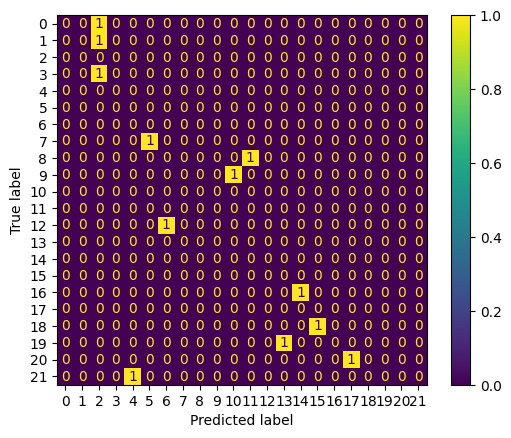

In [92]:
# We will take the model that balance the bias-variance trade-off
gb_model = GradientBoostingClassifier(n_estimators = 50, max_depth = 5, min_samples_leaf  =20, learning_rate = 0.1,random_state = 423) 
gb_model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
 
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot();